In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.operators.unary import complement
from networkx.algorithms.operators.binary import disjoint_union
from pycliques.cliques import clique_graph as k
from pycliques.dominated import has_dominated_vertex, has_s_dismantlable_vertex, has_s_dismantlable_edge, complete_s_collapse, complete_s_collapse_edges
from pycliques.dominated import completely_pared_graph as p
from pycliques.surfaces import is_regular
from pycliques.helly import is_helly
from pycliques.retractions import retraction, is_map, retracts, retracts_to, \
    has_induced
from pycliques.named import suspension_of_cycle, complement_of_cycle, octahedron, \
    graph_suspension
from pycliques.named import snub_dysphenoid as snubd
from pycliques.special import special_octahedra
from pycliques.small import retracts_to_some_suspension_of_cycle, retracts_to_some_complement_of_cycle
from pycliques.coaffinations import automorphisms, coaffinations
from pycliques.cutpoints import local_cutpoints, has_local_cutpoints

def pk(graph):
    the_graph = k(graph, 1300)
    the_graph = nx.convert_node_labels_to_integers(the_graph)
    return p(the_graph)

# gap lists are indexed from 1
def gap_adyacency_list(graph):
    graph = nx.convert_node_labels_to_integers(graph)
    pre_list = [list(graph[i]) for i in graph.nodes()]
    return [[i+1 for i in neigh] for neigh in pre_list]

def is_contractible(g):
    vg = complete_s_collapse(g)
    evg = complete_s_collapse_edges(vg)
    return gap_adyacency_list(evg) == [[]]

# Out[1]:

## 4 vértices



La única gráfica cúbica de 4 vértices es $K_{4}$, y su complemento
  es 4 vértices aislados, por lo tanto, convergente. Además,
  $\overline{K_{4}}$ tiene coafinación.



## 6 vértices



En este caso, las únicas gráficas cúbicas son $K_{3,3}$ y el
  prisma triangular $T_{3}$. El complemento de la primera es
  $2K_{3}$ y el de la segunda es $C_{6}$. Ambas son convergentes y
  tienen coafinación.



## 8 vértices



Por Corollary 2.4, página 43, de Chartrand, Lesniak, Zhang, se tiene
  que el complemento de cualquier gráfica cúbica de más de 8 vértices
  es conexo.



### Conexas



In [1]:
lista08 = nx.read_graph6("./cub08.g6")
len(lista08)

#+RESULTS[a218289cab059982e3a1294ff85723d5d654afb3]:

# Out[53]:
5

Solo hay una gráfica entre las 5 con complemento no Helly.



In [1]:
ccubic = [complement(g) for g in lista08]
still = [i for i, g in enumerate(ccubic) if not is_helly(g)]
still

#+RESULTS[68d2294252abc5dfad7ea88c131c4ccf60fe4728]:

# Out[7]:
[2]

#+RESULTS[2af8bf30656a1622781ee8ca4687f074b19a5fed]:

# Out[8]:

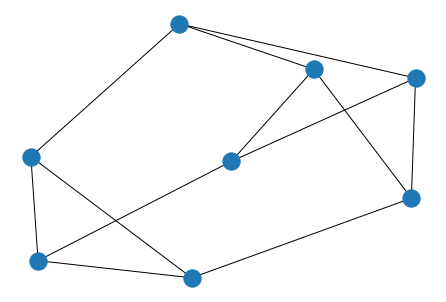

In [1]:
nx.draw(lista08[2])

Y en este caso, la de clanes podada es Helly.



In [1]:
g = complement(lista08[2])
kg = pk(g)
kg.order(), is_helly(kg)

#+RESULTS[9d45c750ea1dd3e7beef5e0a90763c8708dc064c]:

# Out[10]:
(6, True)

### Disconexas



La única gráfica cúbica con 8 vértices disconexa es $K_{4}\cup
K_{4}$, su complemento es $K_{4,4}$, que es Helly.



In [1]:
g = complement(disjoint_union(nx.complete_graph(4), nx.complete_graph(4)))
is_helly(g)

#+RESULTS[c41f8e4716fe27baa648e19bb9f480838752e962]:

# Out[11]:
True

## 10 vértices



### Conexas



In [1]:
lista10 = nx.read_graph6("./cub10.g6")
len(lista10)

#+RESULTS[33d136fb2d9b21649ce1493eec02c9d6bad7dcc1]:

# Out[2]:
19

En este caso, solo el complemento de una cúbica es Helly.



In [1]:
ccubic = [complement(g) for g in lista10]
still = [i for i, g in enumerate(ccubic) if not is_helly(g)]
len(still)

#+RESULTS[5d10b05547c7921159e3d08d1ee30b6ba0ff480b]:

# Out[3]:
18

In [1]:
still = [i for i in still if not special_octahedra(ccubic[i])]
still, len(still)

#+RESULTS[4eb2126c3d6aabc58696220088b9e4210db72d92]:

# Out[4]:
([2, 4, 6, 7, 8, 10, 12, 15, 16], 9)

Ninguna de las 9 restantes, que no tienen retracción especial a
$O_3$, tiene retracción no especial.



In [1]:
still = [i for i in still if not retracts_to(octahedron(3))(ccubic[i])]
len(still)

#+RESULTS[f69984ba56cc2daf15be93e445639236545e2871]:

# Out[5]:
9

In [1]:
still = [i for i in still if not retracts_to(suspension_of_cycle(5))(ccubic[i])]
still, len(still)

#+RESULTS[6bbd4275bbe943f9fa1f135408e7a37f1f016989]:

# Out[6]:
([4, 6, 7, 10, 15, 16], 6)

Ninguna de las 6 restantes tiene gráfica de clanes que sea Helly.



In [1]:
kccubic = dict([(i, pk(ccubic[i])) for i in still])
still = [i for i in still if not is_helly(kccubic[i])]
len(still)

#+RESULTS[9123e711332df447516704a329d9a188e92da4df]:

# Out[7]:
6

In [1]:
still = [i for i in still if not special_octahedra(kccubic[i])]
len(still)

#+RESULTS[36127d79064f645c45a90c7d23a49f7efe28fc39]:

# Out[8]:
6

In [1]:
still = [i for i in still if not retracts_to(octahedron(3))(kccubic[i])]
still, len(still)

#+RESULTS[30ef1b6bce31ed78e5d4e5c1f2572a105cf37dd9]:

# Out[9]:
([4, 6, 7, 10, 16], 5)

In [1]:
still = [i for i in still if not retracts_to(suspension_of_cycle(5))(kccubic[i])]
still, len(still)

#+RESULTS[7e1fbbb83659580251cfb8f9be166e63834cd919]:

# Out[10]:
([4, 6, 7, 10], 4)

In [1]:
still = [i for i in still if not retracts_to(suspension_of_cycle(6))(kccubic[i])]
still, len(still)

#+RESULTS[a010993e694953b05fc04c5481b1f8e939bcfd06]:

# Out[20]:
([4, 6, 7, 10], 4)

In [1]:
still = [i for i in still if not retracts_to(complement_of_cycle(8))(kccubic[i])]
still, len(still)

#+RESULTS[ee5779815f3a749f60444bd856cc97ff6421910d]:

# Out[11]:
([4, 6, 7, 10], 4)

In [1]:
k2ccubic = dict([(i, pk(kccubic[i])) for i in still])
still = [i for i in still if not is_helly(k2ccubic[i])]
[(i, k2ccubic[i].order()) for i in still], len(still)

#+RESULTS[c06f2906951f94c2187021c70d18f048d95cc210]:

# Out[12]:
([(6, 22), (10, 22)], 2)

In [1]:
nx.is_isomorphic(k2ccubic[6], k2ccubic[10])

#+RESULTS[cce082ce6af14655113a4f28498cd54b31c19910]:

# Out[13]:
False

In [1]:
still = [i for i in still if not special_octahedra(k2ccubic[i])]
len(still)

#+RESULTS[f6665e6a0efd2bf6448495dde847b259f1847f01]:

# Out[14]:
2

In [1]:
k3ccubic = dict([(i, pk(k2ccubic[i])) for i in still])
still = [i for i in still if not is_helly(k3ccubic[i])]
[(i, k3ccubic[i].order()) for i in still], len(still)

#+RESULTS[6bf03f70dbaecfe50936af459625fae6555b91aa]:

# Out[15]:
([(6, 34), (10, 61)], 2)

In [1]:
still = [i for i in still if not special_octahedra(k3ccubic[i])]
still, len(still)

# Out[16]:
([], 0)

### Disconexas



El complemento del prisma triangular (i.e., $C_{6}$) tiene
coafinación y es conexo, por lo que $\overline{K_{4}}+C_{6}$ es
divergente por el teorema del sumando conexo.

Por otro lado, el complemento de $K_{3,3}$ ($K_{3}\cup K_{3}$) no
es conexo.



In [1]:
g = complement(disjoint_union(nx.complete_graph(4), nx.complete_bipartite_graph(3,3)))

#+RESULTS[ca73b58868beca27ee265538aa9e9e5fe570b97a]:

# Out[17]:

In [1]:
is_helly(g)

#+RESULTS[75cd28d6c702a74176656e5292d3662fc3a5693e]:

# Out[18]:
True

#+RESULTS[c6ed2c6abd1f3034e6451b27836e50967715ca05]:

# Out[20]:

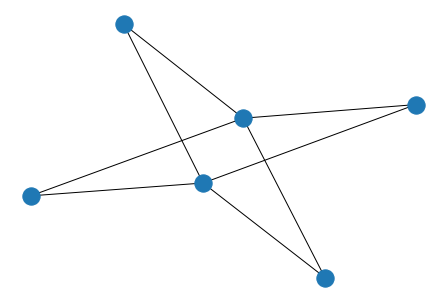

In [1]:
nx.draw(p(g))

## 12 vértices



### Conexas



#### Las gráficas



In [1]:
lista12 = nx.read_graph6("./cub12.g6")
len(lista12)

#+RESULTS[a95ac0f729bf57b1ad0c945afdeacd3546b96cb6]:

# Out[36]:
85

En este caso, ningún complemento de una cúbica es Helly. Conjeturo que
si $G$ es cúbica y $|G|\geq 12$, se tiene que $\overline{G}$ no
es Helly.



In [1]:
ccubic = [complement(g) for g in lista12]
still = [i for i, g in enumerate(ccubic) if not is_helly(g)]
len(still)

#+RESULTS[a39eac8017b2cb0c5c1ce18ab2ca7a3b94267452]:

# Out[37]:
85

In [1]:
still = [i for i in still if not special_octahedra(ccubic[i])]
len(still)

#+RESULTS[e8cab682aa8353a7f3a5d6efea133d951030b160]:

# Out[38]:
45

In [1]:
still = [i for i in still if not retracts_to(octahedron(3))(ccubic[i])]
len(still)

#+RESULTS[f69984ba56cc2daf15be93e445639236545e2871]:

# Out[39]:
17

In [1]:
still = [i for i in still if not retracts_to(octahedron(4))(ccubic[i])]
len(still)

#+RESULTS[0c51b407332796ae2f8598ce4158cc5514e94b7d]:

# Out[40]:
17

In [1]:
still = [i for i in still if not retracts_to(suspension_of_cycle(5))(ccubic[i])]
len(still)

#+RESULTS[ae9a0009eda7d7e04bb69051ac8568e31049f37e]:

# Out[25]:
17

In [1]:
still = [i for i in still if not retracts_to(suspension_of_cycle(6))(ccubic[i])]
len(still)

#+RESULTS[be55f780f28a2dfb86934eb6d1cbeb74c9f17c3d]:

# Out[26]:
17

In [1]:
still = [i for i in still if not retracts_to(suspension_of_cycle(7))(ccubic[i])]
len(still)

#+RESULTS[20069acd4bfdf0ab4efe596a831285fd8101fe98]:

# Out[27]:
17

In [1]:
still = [i for i in still if not retracts_to(suspension_of_cycle(8))(ccubic[i])]
len(still)

#+RESULTS[0d8c5b85cdab851a8eab28ce5368efc6a0c783af]:

# Out[28]:
17

In [1]:
still = [i for i in still if not retracts_to(suspension_of_cycle(9))(ccubic[i])]
len(still)

#+RESULTS[346a5e3f47da5b889723f54890e21c9504b40632]:

# Out[29]:
17

In [1]:
still = [i for i in still if not retracts_to(complement_of_cycle(8))(ccubic[i])]
len(still)

#+RESULTS[7cbbc50378758422c64503cf17f76fc443cda2bd]:

# Out[41]:
16

In [1]:
still = [i for i in still if not retracts_to(complement_of_cycle(10))(ccubic[i])]
len(still)

#+RESULTS[78bb8efd99f4495bdf1ca696737e1aa08d44b9f1]:

# Out[42]:
16

In [1]:
still = [i for i in still if not retracts_to(complement_of_cycle(11))(ccubic[i])]
len(still)

#+RESULTS[c63389ca0b1cca263e7dc2f1b8536a9e7ca39ad4]:

# Out[43]:
16

#### Las de clanes



In [1]:
kccubic = dict([(i, pk(ccubic[i])) for i in still])
still = [i for i in still if not is_helly(kccubic[i])]
[(i, kccubic[i].order()) for i in still], len(still)

#+RESULTS[3828e90ce42d188a3b8d41149e55c8761b3f40f0]:

# Out[44]:
#+BEGIN_EXAMPLE
  ([(5, 29),
  (20, 30),
  (22, 26),
  (34, 29),
  (39, 23),
  (43, 36),
  (47, 32),
  (54, 28),
  (64, 13),
  (67, 18),
  (69, 19),
  (75, 30),
  (76, 19),
  (80, 27),
  (81, 23),
  (83, 28)],
  16)
#+END_EXAMPLE

In [1]:
still = [i for i in still if not special_octahedra(kccubic[i])]
still, len(still)

# Out[45]:
([5, 22, 34, 39, 43, 47, 54, 64, 75, 76, 80, 81, 83], 13)

#### Las segundas de clanes



In [1]:
k2ccubic = dict([(i, pk(kccubic[i])) for i in still])
still = [i for i in still if not is_helly(k2ccubic[i])]
[(i, k2ccubic[i].order()) for i in still], len(still)

#+RESULTS[c06f2906951f94c2187021c70d18f048d95cc210]:

# Out[46]:
#+BEGIN_EXAMPLE
  ([(5, 112),
  (22, 116),
  (34, 153),
  (39, 74),
  (43, 284),
  (47, 212),
  (54, 151),
  (64, 24),
  (75, 224),
  (76, 64),
  (80, 173),
  (81, 126),
  (83, 234)],
  13)
#+END_EXAMPLE

#### Coafinations and local cutpoints



In [1]:
[list(coaffinations(ccubic[i], 2)) for i in still]

#+RESULTS[b2525034e0f8b65131adb582556bc96a1cc41274]:

# Out[50]:
[[], [], [], [], [], [], [], [], [], [], [], [], []]

In [1]:
[has_local_cutpoints(coaffinations(ccubic[i], 2)) for i in still]

#+RESULTS[22b9e02578abcc2941718a1d7cbdcd447f159d0a]:

# Out[51]:
#+BEGIN_EXAMPLE
  [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False]
#+END_EXAMPLE

### Disconexas



#### 4+4+4



$\overline{K_{4}\cup K_{4}\cup K_{4}}$ es divergente por teorema de
  tres sumandos



#### 4+8



Si una gráfica de 8 vértices es tal que su complemento tiene
coafinación, por teorema de sumando conexo, la unión disjunta de tal
gráfica con $K_{4}$ tiene complemento divergente.



In [1]:
still = [i for i, g in enumerate(lista08) if len(list(coaffinations(complement(g), 2))) == 0]
still

#+RESULTS[4b8e0d2f96d7ba46dde15f7adbdbfd23cf4e3268]:

# Out[57]:
[0, 1, 2]

In [1]:
cubicas = dict([(i, disjoint_union(nx.complete_graph(4), lista08[i])) for i in still])
ccubic = [complement(cubicas[i]) for i in still]
still = [i for i in still if not is_helly(ccubic[i])]
still, len(still)

#+RESULTS[e24abe0295c0d0635f04ca1a9807f5ced44ec09f]:

# Out[62]:
([0, 1, 2], 3)

In [1]:
still = [i for i in still if not special_octahedra(ccubic[i])]
still, len(still)

#+RESULTS[4eb2126c3d6aabc58696220088b9e4210db72d92]:

# Out[63]:
([2], 1)

In [1]:
still = [i for i in still if not retracts_to(octahedron(3))(ccubic[i])]
len(still)

#+RESULTS[f69984ba56cc2daf15be93e445639236545e2871]:

# Out[64]:
0

#### 6+6



El complemento del prisma triangular $T_{3}$ (i.e. $C_{6}$) es
conexo y tiene coafinación, por lo que $T_{3}\cup T_{3}$ y
$T_{3}\cup K_{3,3}$ tienen complemento divergente.

Sin embargo, el complemento de $K_{3,3}\cup K_{3,3}$ se desmantela a
$C_{4}$, por lo que es convergente.



## 14 vértices



### Conexas



#### Las gráficas



In [1]:
lista14 = nx.read_graph6("./cub14.g6")
len(lista14)

#+RESULTS[a95ac0f729bf57b1ad0c945afdeacd3546b96cb6]:

# Out[3]:
509

In [1]:
ccubic = [complement(g) for g in lista14]
still = [i for i, g in enumerate(ccubic) if not is_helly(g)]
len(still)

#+RESULTS[124a9ba45ff7ef7e3b1fbcca113c9484efa3bcbc]:

# Out[4]:
509

In [1]:
still = [i for i in still if not special_octahedra(ccubic[i])]
len(still)

#+RESULTS[e8cab682aa8353a7f3a5d6efea133d951030b160]:

# Out[5]:
220

#### Las de clanes



In [1]:
kccubic = dict([(i, pk(ccubic[i])) for i in still])
khelly = [i for i in still if is_helly(kccubic[i])]
still = [i for i in still if not i in khelly]
len(still), khelly

# Out[6]:
(215, [26, 399, 404, 405, 415])

In [1]:
[kccubic[i].order() for i in khelly]

#+RESULTS[164f94c32d31dec58cc862fb557448d8fca7055c]:

# Out[13]:
[1, 1, 1, 1, 1]

#+RESULTS[f861c60872f304875e426d3044fe021511ea4a8c]:

# Out[33]:

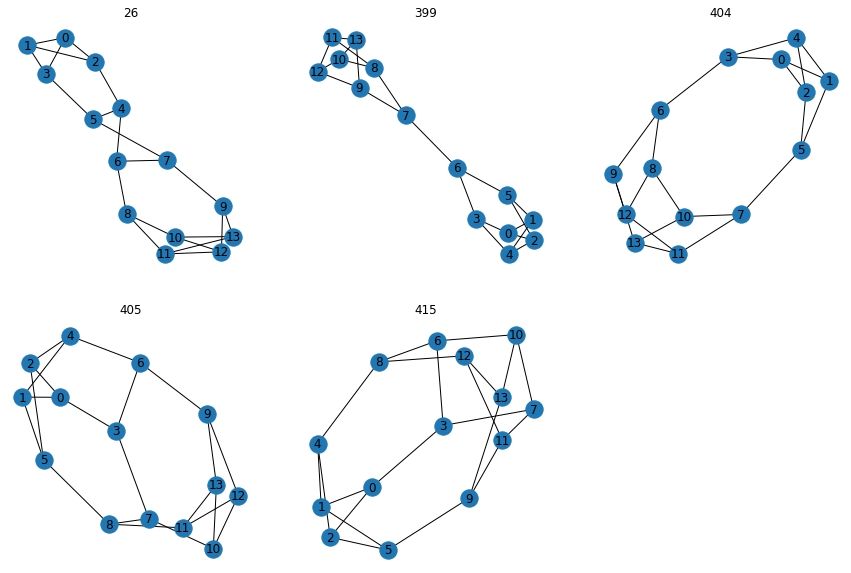

In [1]:
plt.figure(figsize=(15,10))

for i in range(len(khelly)):
    plt.subplot("23"+str(i+1))
    plt.title(str(khelly[i]))
    nx.draw(lista14[khelly[i]], with_labels='True')

plt.show()

#+RESULTS[b1b43043b8f583d376cd259e7db4a8f15b5c7d76]:

# Out[34]:

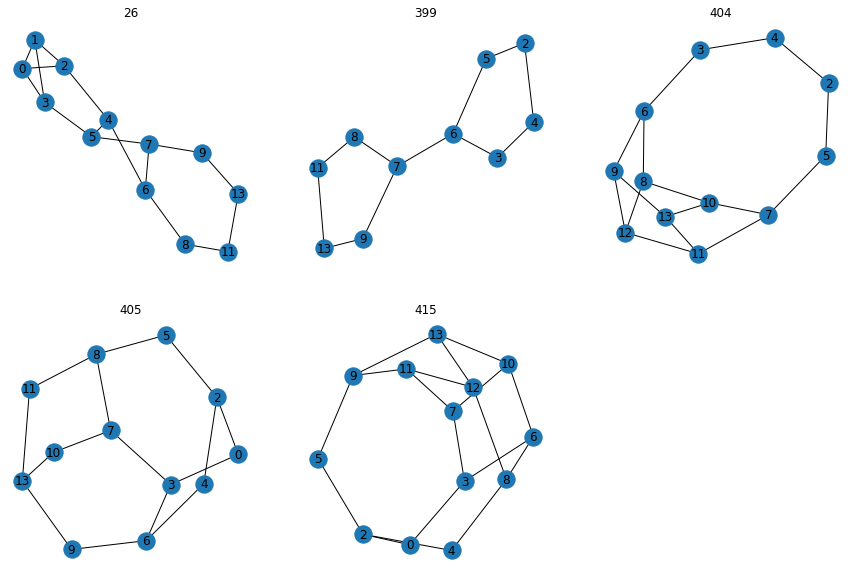

In [1]:
plt.figure(figsize=(15,10))

for i in range(len(khelly)):
    plt.subplot("23"+str(i+1))
    plt.title(str(khelly[i]))
    nx.draw(complement(p(complement(lista14[khelly[i]]))), with_labels='True')

plt.show()

#### Las segundas de clanes



In [1]:
k2ccubic = dict([(i, k(kccubic[i], 300)) for i in still])
k2ccubic = dict([(i, p(k2ccubic[i])) for i in still if k2ccubic[i] is not None])
k2helly = [i for i in k2ccubic.keys() if is_helly(k2ccubic[i])]
still = [i for i in k2ccubic.keys() if not i in k2helly]
len(still), k2helly

# Out[9]:
(28, [56, 84, 128, 155, 157, 168, 407, 414, 416])

In [1]:
[k2ccubic[i].order() for i in k2helly]

#+RESULTS[0d7a161def4432596aefdda53ef6d85090ffbbf3]:

# Out[14]:
[1, 1, 1, 1, 1, 1, 1, 1, 1]

#+RESULTS[3a1f8ffd5e6ac85bfa673fdd73e59ad30f7c1e83]:

# Out[35]:

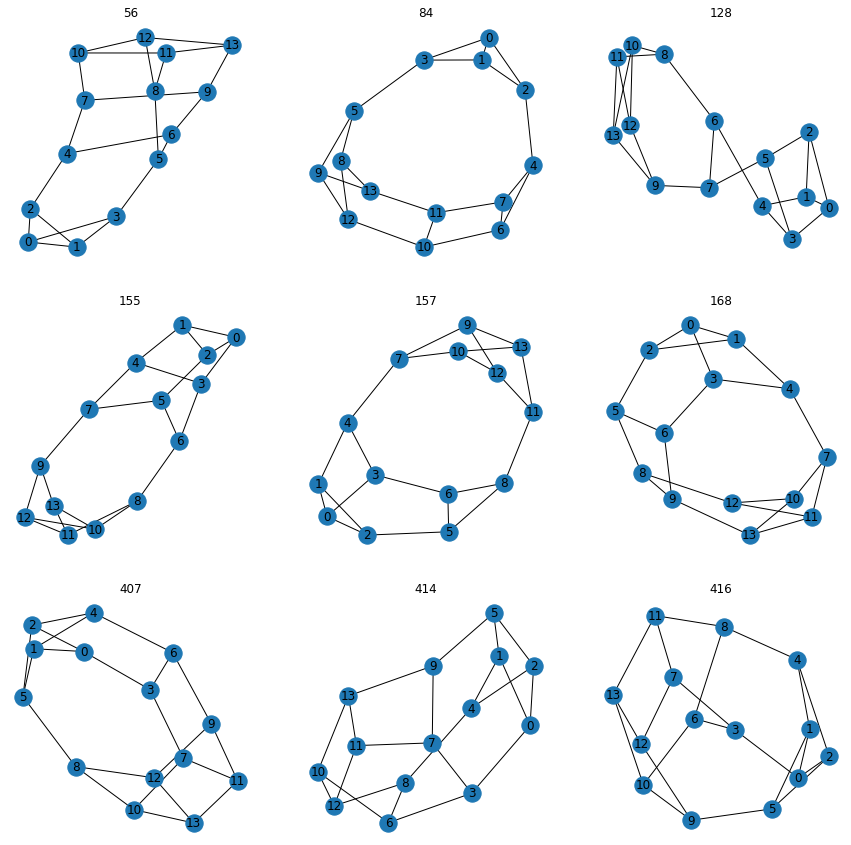

In [1]:
plt.figure(figsize=(15,15))

for i in range(len(k2helly)):
    plt.subplot("33"+str(i+1))
    plt.title(str(k2helly[i]))
    nx.draw(lista14[k2helly[i]], with_labels='True')

plt.show()

#+RESULTS[084b20f8a2a2441408e5d17a4d269452e0f4507a]:

# Out[32]:

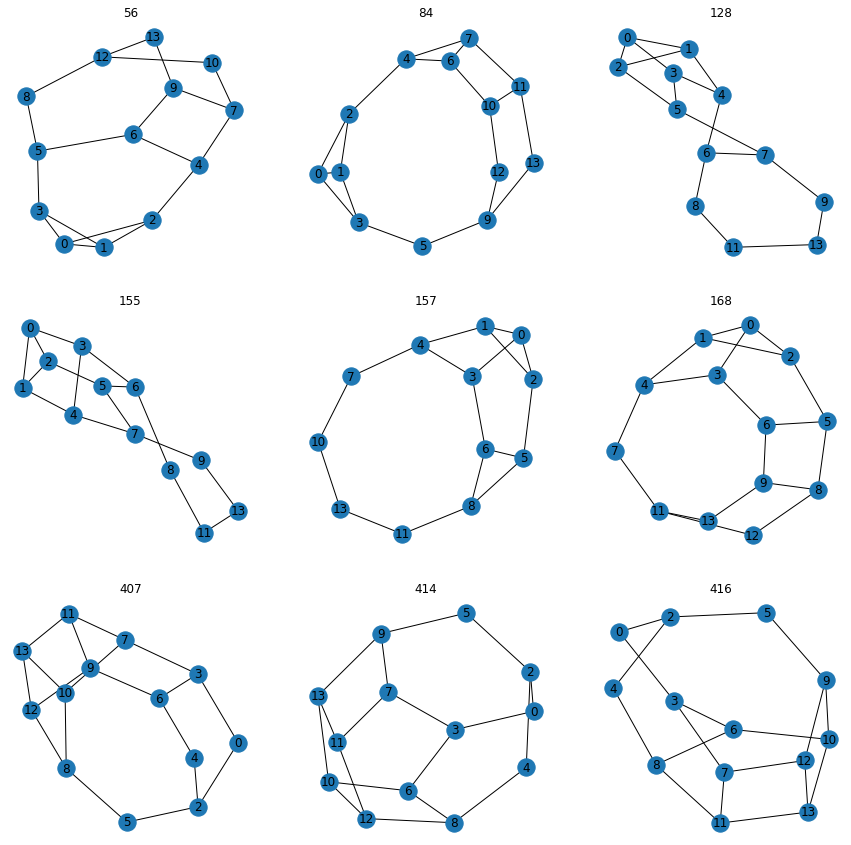

In [1]:
plt.figure(figsize=(15,15))

for i in range(len(k2helly)):
    plt.subplot("33"+str(i+1))
    plt.title(str(k2helly[i]))
    nx.draw(complement(p(complement(lista14[k2helly[i]]))), with_labels='True')

plt.show()

In [1]:
k3ccubic = dict([(i, k(k2ccubic[i], 500)) for i in still])
k3ccubic = dict([(i, p(k3ccubic[i])) for i in still if k3ccubic[i] is not None])
k3helly = [i for i in k3ccubic.keys() if is_helly(k3ccubic[i])]
still = [i for i in k3ccubic.keys() if not i in k3helly]
len(still), k3helly

#+RESULTS[7f495d3ea2e7afca4bdffe313fdda5198c396a43]:

# Out[11]:
(5, [])

In [1]:
k4ccubic = dict([(i, k(k3ccubic[i], 1000)) for i in still])
k4ccubic = dict([(i, p(k4ccubic[i])) for i in still if k4ccubic[i] is not None])
k4helly = [i for i in k4ccubic.keys() if is_helly(k4ccubic[i])]
still = [i for i in k4ccubic.keys() if not i in k4helly]
len(still), k4helly

#+RESULTS[ea5170c8c7a43f48522a1dfe345bfbd1f4791b2a]:

# Out[12]:
(0, [])

### Disconexas



#### 4+4+6



Como los complementos de las dos gráficas cúbicas con 6 vértices
tienen coafinación, las dos son convergentes por el teorema de los
tres sumandos



#### 4+10



Si una gráfica de 10 vértices es tal que su complemento tiene
coafinación, por teorema de sumando conexo, la unión disjunta de tal
gráfica con $K_{4}$ tiene complemento divergente.



In [1]:
still = [i for i, g in enumerate(lista10) if len(list(coaffinations(complement(g), 2))) == 0]
still, len(still)

#+RESULTS[a8081ebdab9291e796a900c0b2a1bc2dbade1ded]:

# Out[3]:
([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 17, 18], 17)

In [1]:
cubicas = dict([(i, disjoint_union(nx.complete_graph(4), lista10[i])) for i in still])
ccubic = dict([(i, complement(cubicas[i])) for i in still])
still = [i for i in still if not is_helly(ccubic[i])]
still, len(still)

# Out[4]:
([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 17, 18], 17)

#+RESULTS[26914ceecc0d53b7793a510f9cb0df2937cca238]:

# Out[62]:

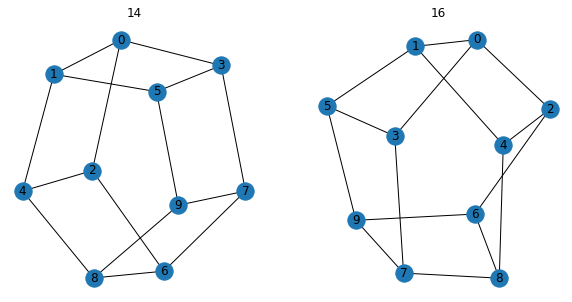

In [1]:
plt.figure(figsize=(10,5))

for i in range(2):
    plt.subplot("12"+str(i+1))
    plt.title(str([14, 16][i]))
    nx.draw(lista10[[14, 16][i]], with_labels='True')

plt.show()

In [1]:
still = [i for i in still if not special_octahedra(ccubic[i])]
still, len(still)

# Out[5]:
([2, 4, 6, 7, 8, 10, 12, 15], 8)

#+RESULTS[f6f2e96ecbad9174dbdec9256eb77ad8bd408ab8]:

# Out[55]:

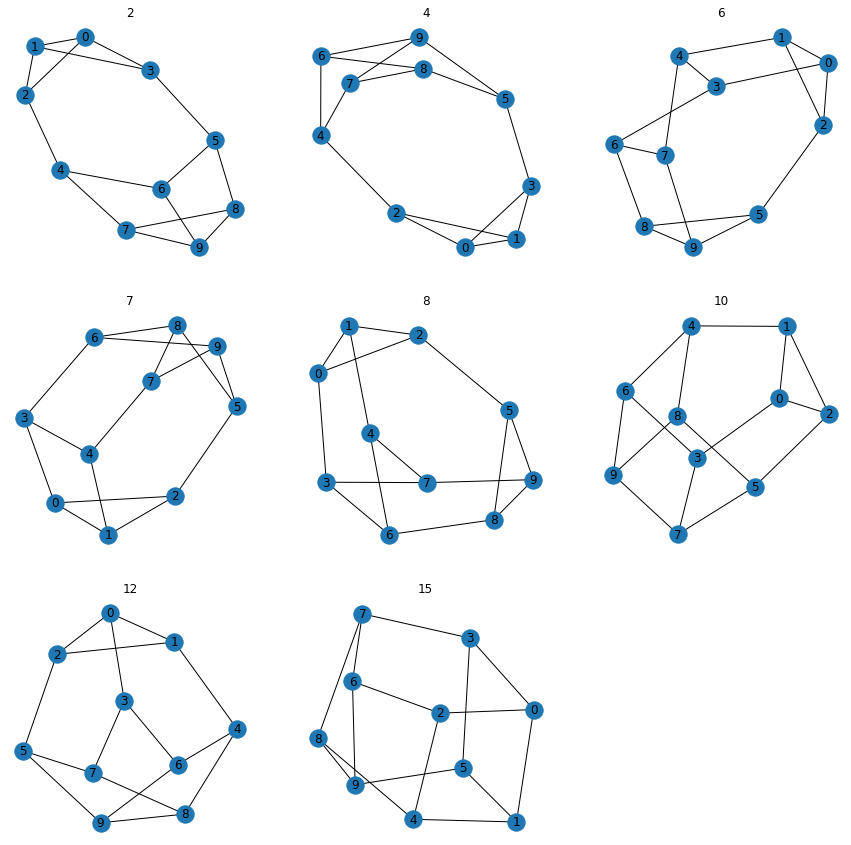

In [1]:
plt.figure(figsize=(15,15))

for i in range(len(still)):
    plt.subplot("33"+str(i+1))
    plt.title(str(still[i]))
    nx.draw(lista10[still[i]], with_labels='True')

plt.show()

In [1]:
still = [i for i in still if not retracts_to(octahedron(3))(ccubic[i])]
len(still)

# Out[44]:
8

In [1]:
still = [i for i in still if not retracts_to(suspension_of_cycle(5))(ccubic[i])]
len(still)

#+RESULTS[ae9a0009eda7d7e04bb69051ac8568e31049f37e]:

# Out[56]:
8

In [1]:
still = [i for i in still if not retracts_to(suspension_of_cycle(6))(ccubic[i])]
len(still)

#+RESULTS[be55f780f28a2dfb86934eb6d1cbeb74c9f17c3d]:

# Out[57]:
8

In [1]:
still = [i for i in still if not retracts_to(suspension_of_cycle(7))(ccubic[i])]
len(still)

#+RESULTS[20069acd4bfdf0ab4efe596a831285fd8101fe98]:

# Out[58]:
8

In [1]:
still = [i for i in still if not retracts_to(suspension_of_cycle(8))(ccubic[i])]
len(still)

#+RESULTS[0d8c5b85cdab851a8eab28ce5368efc6a0c783af]:

# Out[59]:
8

In [1]:
still = [i for i in still if not retracts_to(complement_of_cycle(8))(ccubic[i])]
len(still)

#+RESULTS[7cbbc50378758422c64503cf17f76fc443cda2bd]:

# Out[60]:
8

In [1]:
kccubic = dict([(i, pk(ccubic[i])) for i in still])
khelly = [i for i in still if is_helly(kccubic[i])]
still = [i for i in still if not i in khelly]
len(still), khelly

# Out[45]:
(8, [])

In [1]:
[kccubic[i].order() for i in still]

#+RESULTS[43aea325bc9cbcb112d0724ab5d1235cdf1c6765]:

# Out[46]:
[68, 36, 56, 44, 72, 52, 60, 48]

In [1]:
k2ccubic = dict([(i, k(kccubic[i], 300)) for i in still])
k2ccubic = dict([(i, p(k2ccubic[i])) for i in still if k2ccubic[i] is not None])
k2helly = [i for i in k2ccubic.keys() if is_helly(k2ccubic[i])]
still = [i for i in k2ccubic.keys() if not i in k2helly]
len(still), k2helly

#+RESULTS[1707b01d44ecbbc60f8b47f1d8795912a4e32ad5]:

# Out[47]:
(1, [])

In [1]:
k3ccubic = dict([(i, k(k2ccubic[i], 500)) for i in still])
k3ccubic = dict([(i, p(k3ccubic[i])) for i in still if k3ccubic[i] is not None])
k3helly = [i for i in k3ccubic.keys() if is_helly(k3ccubic[i])]
still = [i for i in k3ccubic.keys() if not i in k3helly]
len(still), k3helly

#+RESULTS[7f495d3ea2e7afca4bdffe313fdda5198c396a43]:

# Out[48]:
(0, [])